In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Dense, Flatten, BatchNormalization
import importlib
import tensorflow as tf

import sys
sys.path.append("../attacks/")
sys.path.append("../utils/")

import utils
from data_manager import load_data

# Black Box Attacks
import random_noise
import EvoStrategy
import SimbaWrapper

Only run train below if model is not available as .h5 file (in general, a baseline model should be available in 'basic_cnn_mnist.h5' to save time)

In [2]:
# batch_size = 60 
# nb_epoch = 2
# input_shape = (28,28,1)
# model_ = Sequential()
# model_.add(Conv2D(100,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
# model_.add(MaxPooling2D(pool_size=(2, 2)))
# #model_.add(BatchNormalization())
# #model_.add(Dropout(0.2))

# model_.add(Conv2D(75, kernel_size=(3, 3),activation='relu',padding='same') )
# model_.add(MaxPooling2D(pool_size=(2, 2)))
# #model_.add(BatchNormalization())
# #model_.add(Dropout(0.2))

# model_.add(Dropout(0.25))
# model_.add(Flatten())
# model_.add(Dense(64, activation='relu'))
# model_.add(Dropout(0.5))
# model_.add(Dense(10, activation='softmax'))

# model_.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer='adam',
#               metrics=['accuracy'])


In [3]:
(X_train, y_train), (X_test, y_test) = load_data("mnist")

In [24]:
# history=model_.fit(X_train, y_train,
#           batch_size=batch_size,
#           epochs=nb_epoch,
#           verbose=1,
#           validation_data=(X_test, y_test))
# score = model_.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 561s 9ms/sample - loss: 0.6386 - accuracy: 0.8051 - val_loss: 0.0747 - val_accuracy: 0.9774
Epoch 2/2
60000/60000 [==============================] - 569s 9ms/sample - loss: 0.2141 - accuracy: 0.9360 - val_loss: 0.0609 - val_accuracy: 0.9828


In [25]:
# model_.save("basic_cnn_mnist.h5")

In [4]:
model_ = tf.keras.models.load_model('../models/basic_cnn_mnist.h5')

In [5]:
sample_size_test_mnist = 100
sample_x_test = np.copy(X_test[:sample_size_test_mnist])
sample_y_test = np.copy(y_test[:sample_size_test_mnist])

In [6]:
sample_size_train_mnist = 100
sample_x_train = np.copy(X_train[:sample_size_train_mnist])
sample_y_train = np.copy(y_train[:sample_size_train_mnist])

<h3>Random noise expriments</h3>

Step 19 / 20
Previous robustness:  0.56


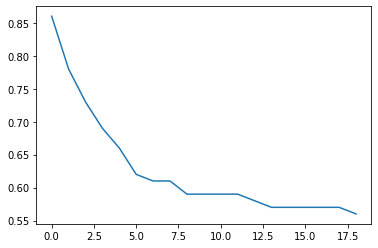

In [10]:
importlib.reload(random_noise)

agreements_cell_test, saved_noisy_imgs_cell_test, number_queries = random_noise.check_noise_robustness_multiple_rounds(
    model_,                  # model to attack
    sample_x_test,           # sample images to attack
    sample_y_test,           # correct labels of the sample images
    20,                      # max number of steps to run the attack for
    noise_type="cells",      # 'cells' by default, it is gaussian noise added to a random set of pixels
    args={"cell_count":28}   # 'cell_count' is how many pixels to randomly perturb at maximum; so l0 distance <= cell_count value
)

(array([13.,  7.,  5.,  0.,  2.,  0.,  1.,  1.,  0.,  1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

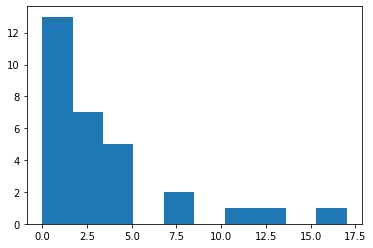

In [15]:
# number_queries is a dict containing pairs img_id: number_steps_to_perturb. 0 means it was already classified wrong
plt.hist(number_queries.values())

<h3>Evo strategy experiments</h3>


0
After 11 generations
Label: 7 ; Prediction: 3
Fitness: -0.41606355


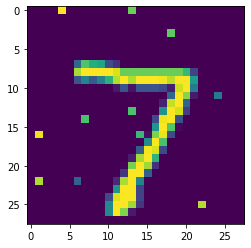



1
After 12 generations
Label: 2 ; Prediction: 8
Fitness: -0.11693759


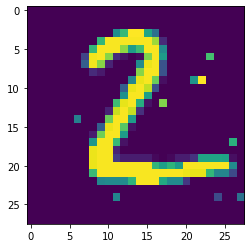



2
After 6 generations
Label: 1 ; Prediction: 2
Fitness: -0.30722418


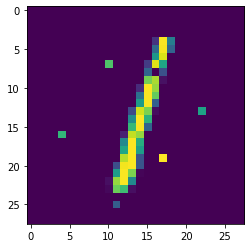



3
After 13 generations
Label: 0 ; Prediction: 6
Fitness: -0.40188283


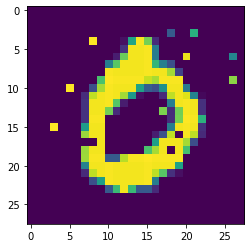



4
After 7 generations
Label: 4 ; Prediction: 9
Fitness: -0.2726911


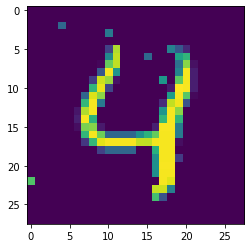



5
After 5 generations
Label: 1 ; Prediction: 2
Fitness: -0.23339231


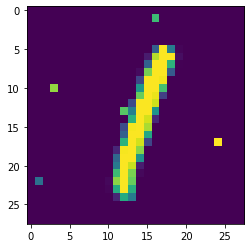



6
After 6 generations
Label: 4 ; Prediction: 9
Fitness: -0.19155501


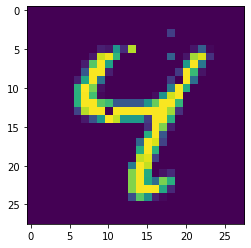



7
After 5 generations
Label: 9 ; Prediction: 4
Fitness: -0.1776674


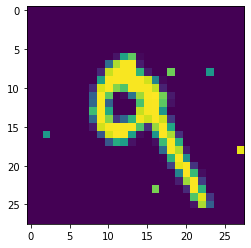



8
After 9 generations
Label: 5 ; Prediction: 8
Fitness: -0.47827744


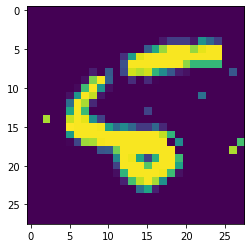



9
After 8 generations
Label: 9 ; Prediction: 7
Fitness: -0.33277565


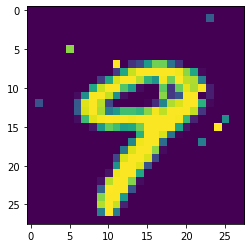



10
After 14 generations
Label: 0 ; Prediction: 8
Fitness: -0.38562703


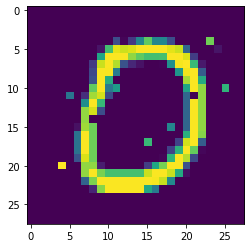



11
After 15 generations
Label: 6 ; Prediction: 5
Fitness: -0.40847299


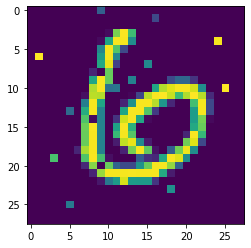



12
After 6 generations
Label: 9 ; Prediction: 4
Fitness: -0.4182658


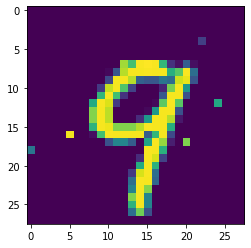



13
After 30 generations
Label: 0 ; Prediction: 6
Fitness: -0.2525304


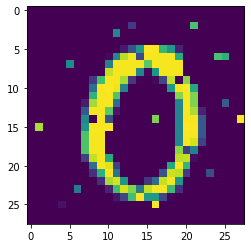



14
After 8 generations
Label: 1 ; Prediction: 5
Fitness: -0.37877342


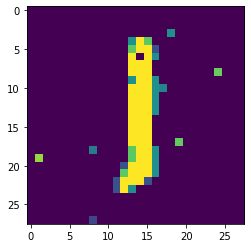



15
After 8 generations
Label: 5 ; Prediction: 3
Fitness: -0.3961851


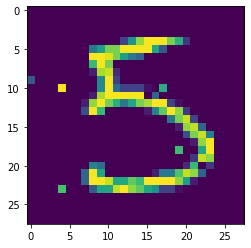



16
After 6 generations
Label: 9 ; Prediction: 7
Fitness: -0.37929964


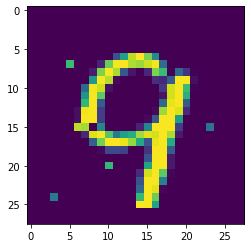



17
After 9 generations
Label: 7 ; Prediction: 9
Fitness: -0.4311477


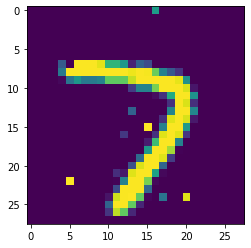



18
After 1 generations
Label: 3 ; Prediction: 5
Fitness: -0.24619631


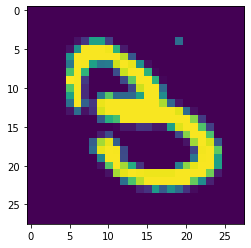



19
After 13 generations
Label: 4 ; Prediction: 7
Fitness: -0.16080345


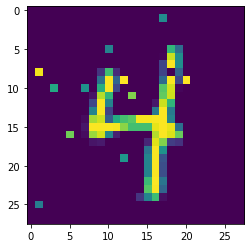



20
After 2 generations
Label: 9 ; Prediction: 7
Fitness: -0.30317953


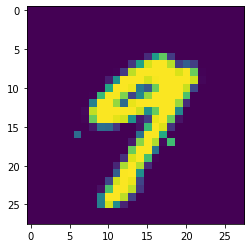



21
After 7 generations
Label: 6 ; Prediction: 5
Fitness: -0.16001822


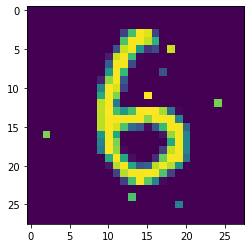



22
After 12 generations
Label: 6 ; Prediction: 4
Fitness: -0.32578388


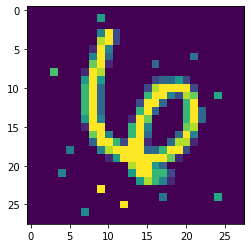



23
After 10 generations
Label: 5 ; Prediction: 3
Fitness: -0.074344635


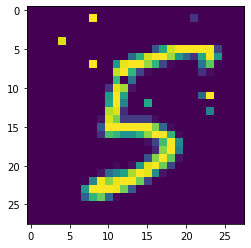



24
After 12 generations
Label: 4 ; Prediction: 9
Fitness: -0.3401981


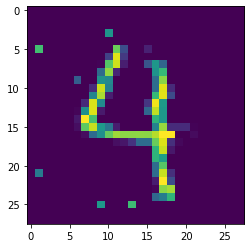



25
After 22 generations
Label: 0 ; Prediction: 6
Fitness: -0.4058729


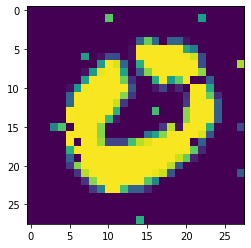



26
After 5 generations
Label: 7 ; Prediction: 9
Fitness: -0.46742314


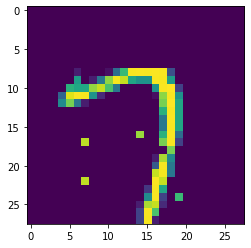



27
After 29 generations
Label: 4 ; Prediction: 9
Fitness: -0.42594743


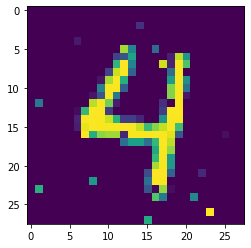



28
After 9 generations
Label: 0 ; Prediction: 2
Fitness: -0.39101598


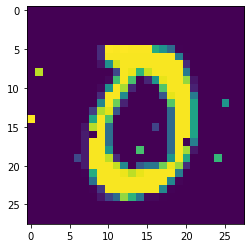



29
After 5 generations
Label: 1 ; Prediction: 5
Fitness: -0.05601209


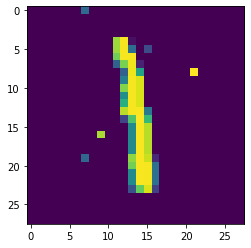



30
After 6 generations
Label: 3 ; Prediction: 5
Fitness: -0.008491784


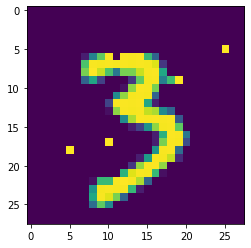



31
After 6 generations
Label: 1 ; Prediction: 4
Fitness: -0.1265266


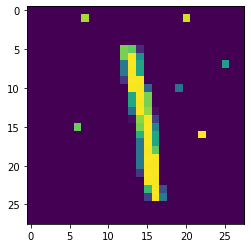



32
After 19 generations
Label: 3 ; Prediction: 2
Fitness: -0.41143036


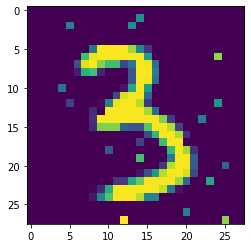



33
After 2 generations
Label: 4 ; Prediction: 0
Fitness: -0.38846564


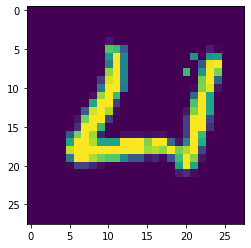



34
After 11 generations
Label: 7 ; Prediction: 2
Fitness: -0.17814006


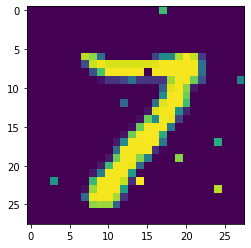



35
After 17 generations
Label: 2 ; Prediction: 8
Fitness: -0.26679698


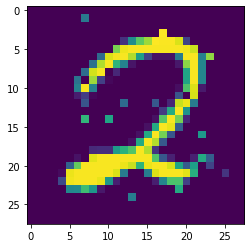



36
After 6 generations
Label: 7 ; Prediction: 2
Fitness: -0.14996354


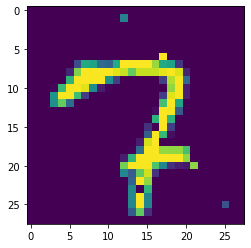



37
After 4 generations
Label: 1 ; Prediction: 4
Fitness: -0.08954414


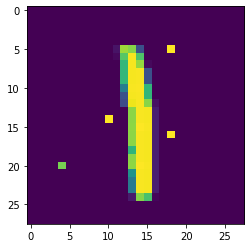



38
After 8 generations
Label: 2 ; Prediction: 8
Fitness: -0.2748949


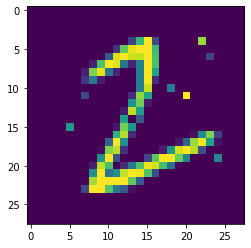



39
After 6 generations
Label: 1 ; Prediction: 2
Fitness: -0.18905169


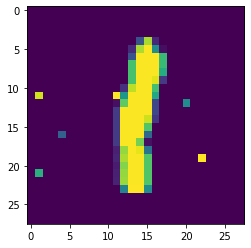



40
After 5 generations
Label: 1 ; Prediction: 8
Fitness: -0.028958412


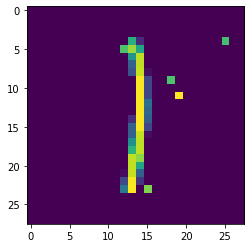



41
After 3 generations
Label: 7 ; Prediction: 2
Fitness: -0.28210026


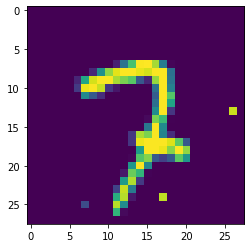



42
After 11 generations
Label: 4 ; Prediction: 9
Fitness: -0.05875125


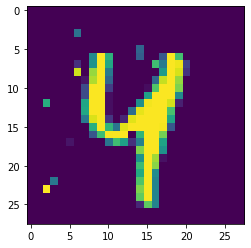



43
After 7 generations
Label: 2 ; Prediction: 4
Fitness: -0.29677847


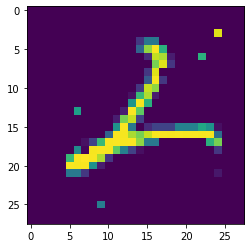



44
After 4 generations
Label: 3 ; Prediction: 5
Fitness: -0.36886752


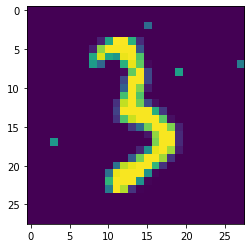



45
After 4 generations
Label: 5 ; Prediction: 8
Fitness: -0.15357172


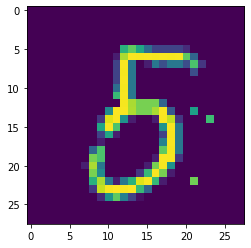



46
After 6 generations
Label: 1 ; Prediction: 2
Fitness: -0.14386241


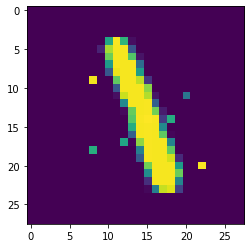



47
After 46 generations
Label: 2 ; Prediction: 8
Fitness: -0.19324048


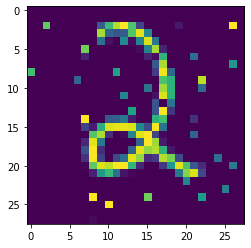



48
After 6 generations
Label: 4 ; Prediction: 9
Fitness: -0.3279817


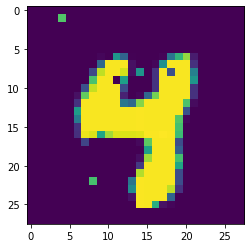



49
After 12 generations
Label: 4 ; Prediction: 9
Fitness: -0.4010261


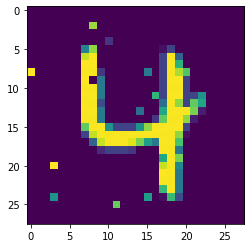



50
After 11 generations
Label: 6 ; Prediction: 5
Fitness: -0.4441981


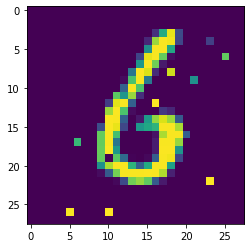



51
After 4 generations
Label: 3 ; Prediction: 5
Fitness: -0.33362344


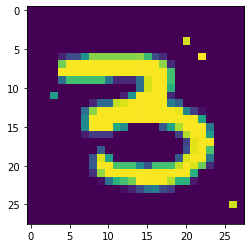



52
After 18 generations
Label: 5 ; Prediction: 3
Fitness: -0.2648124


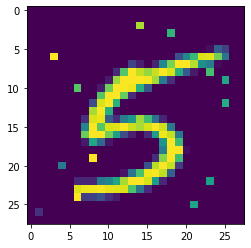



53
After 13 generations
Label: 5 ; Prediction: 3
Fitness: -0.37449628


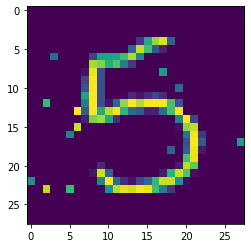



54
After 16 generations
Label: 6 ; Prediction: 0
Fitness: -0.27929932


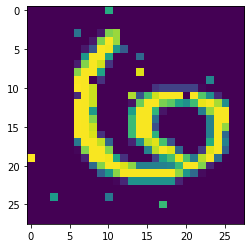



55
After 5 generations
Label: 0 ; Prediction: 8
Fitness: -0.17408814


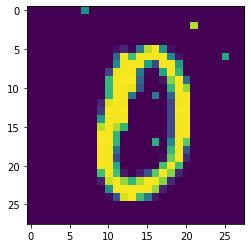



56
After 18 generations
Label: 4 ; Prediction: 5
Fitness: -0.4861674


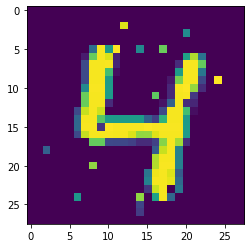



57
After 7 generations
Label: 1 ; Prediction: 4
Fitness: -0.036236398


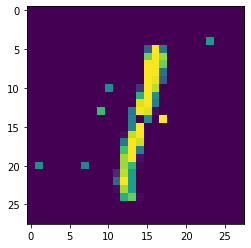



58
After 6 generations
Label: 9 ; Prediction: 4
Fitness: -0.05585009


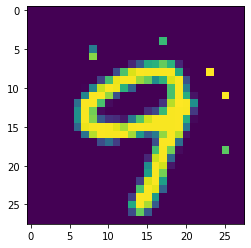



59
After 3 generations
Label: 5 ; Prediction: 7
Fitness: -0.19390626


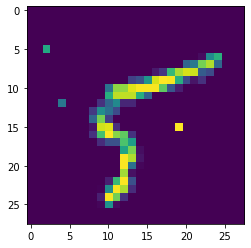



60
After 16 generations
Label: 7 ; Prediction: 3
Fitness: -0.30176243


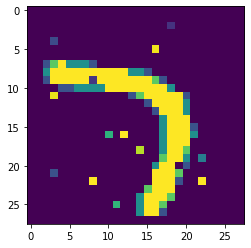



61
After 4 generations
Label: 8 ; Prediction: 2
Fitness: -0.20822066


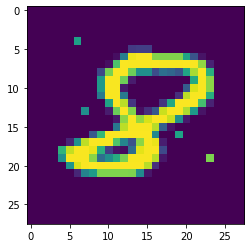



62
After 1 generations
Label: 9 ; Prediction: 5
Fitness: -0.004651682


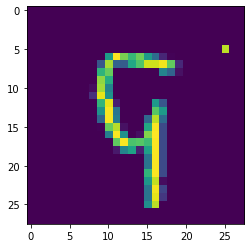



63
After 2 generations
Label: 3 ; Prediction: 2
Fitness: -0.014786048


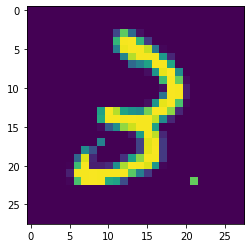



64
After 11 generations
Label: 7 ; Prediction: 2
Fitness: -0.24485603


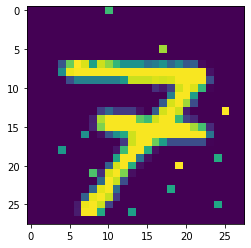



65
After 5 generations
Label: 4 ; Prediction: 9
Fitness: -0.2243708


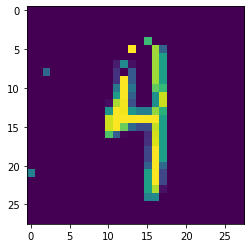



66
After 8 generations
Label: 6 ; Prediction: 0
Fitness: -0.3760608


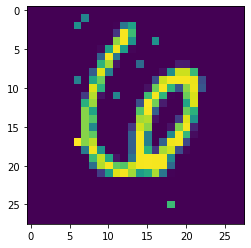



67
After 13 generations
Label: 4 ; Prediction: 1
Fitness: -0.4072879


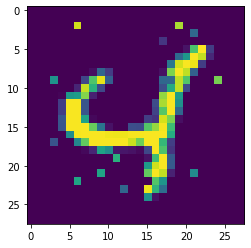



68
After 12 generations
Label: 3 ; Prediction: 2
Fitness: -0.28528845


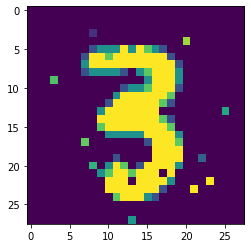



69
After 23 generations
Label: 0 ; Prediction: 6
Fitness: -0.20893528


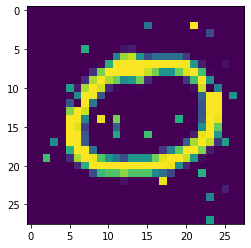



70
After 26 generations
Label: 7 ; Prediction: 3
Fitness: -0.20334423


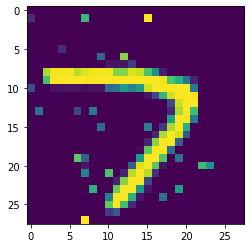



71
After 21 generations
Label: 0 ; Prediction: 8
Fitness: -0.39912096


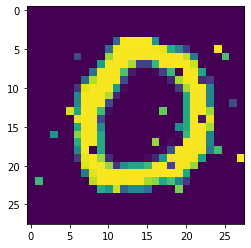



72
After 9 generations
Label: 2 ; Prediction: 3
Fitness: -0.24128462


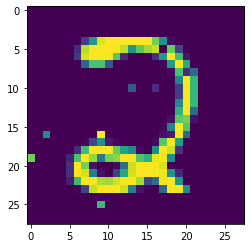



73
After 2 generations
Label: 9 ; Prediction: 7
Fitness: -0.25303772


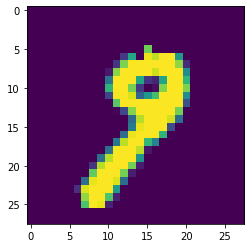



74
After 6 generations
Label: 1 ; Prediction: 8
Fitness: -0.27336222


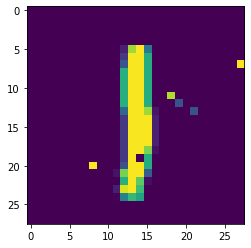



75
After 13 generations
Label: 7 ; Prediction: 3
Fitness: -0.29494423


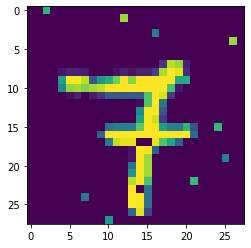



76
After 8 generations
Label: 3 ; Prediction: 2
Fitness: -0.41495928


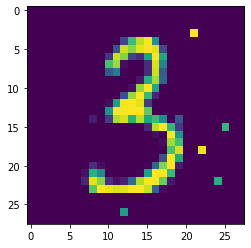



77
After 12 generations
Label: 2 ; Prediction: 8
Fitness: -0.15266144


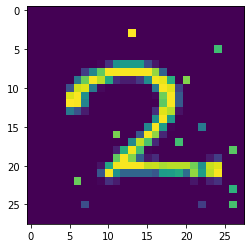



78
After 2 generations
Label: 9 ; Prediction: 2
Fitness: -0.09934238


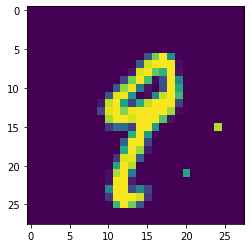



79
After 14 generations
Label: 7 ; Prediction: 2
Fitness: -0.28231126


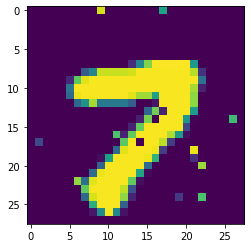



80
After 6 generations
Label: 7 ; Prediction: 9
Fitness: -0.34846407


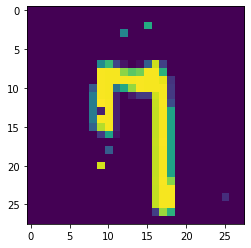



81
After 13 generations
Label: 6 ; Prediction: 2
Fitness: -0.039578866


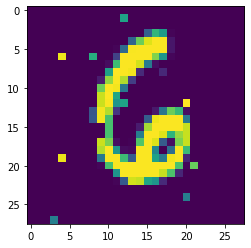



82
After 49 generations
Label: 2 ; Prediction: 3
Fitness: -0.3484601


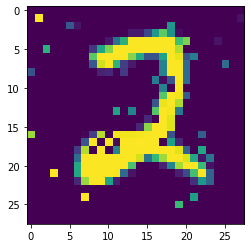



83
After 8 generations
Label: 7 ; Prediction: 9
Fitness: -0.4013836


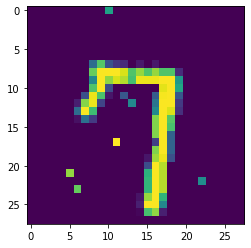



84
After 8 generations
Label: 8 ; Prediction: 5
Fitness: -0.43672433


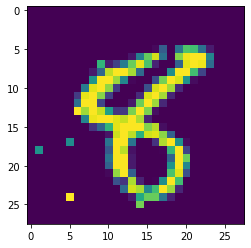



85
After 14 generations
Label: 4 ; Prediction: 9
Fitness: -0.36412546


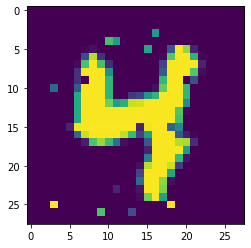



86
After 18 generations
Label: 7 ; Prediction: 3
Fitness: -0.34756464


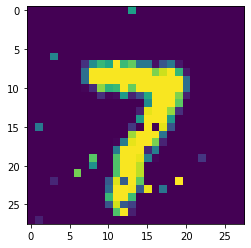



87
After 10 generations
Label: 3 ; Prediction: 2
Fitness: -0.2841048


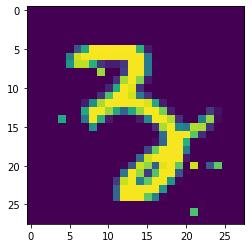



88
After 25 generations
Label: 6 ; Prediction: 4
Fitness: -0.42502546


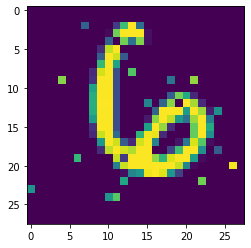



89
After 8 generations
Label: 1 ; Prediction: 2
Fitness: -0.34022135


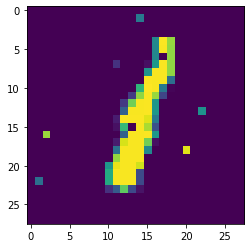



90
After 15 generations
Label: 3 ; Prediction: 8
Fitness: -0.31683555


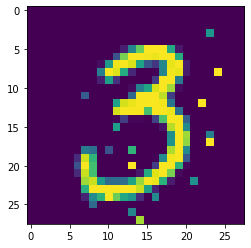



91
After 23 generations
Label: 6 ; Prediction: 4
Fitness: -0.40107918


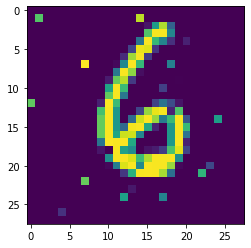



92
After 3 generations
Label: 9 ; Prediction: 4
Fitness: -0.24109966


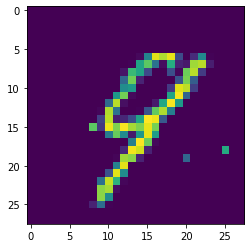



93
After 7 generations
Label: 3 ; Prediction: 5
Fitness: -0.41445985


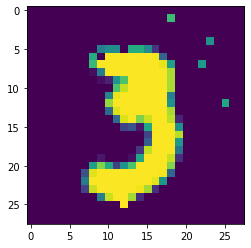



94
After 4 generations
Label: 1 ; Prediction: 8
Fitness: -0.38474834


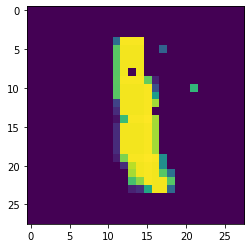



95
After 5 generations
Label: 4 ; Prediction: 8
Fitness: -0.18084656


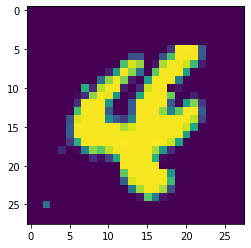



96
After 4 generations
Label: 1 ; Prediction: 5
Fitness: -0.32944942


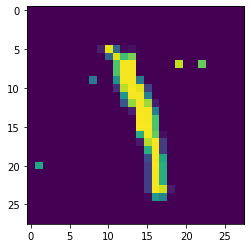



97
After 3 generations
Label: 7 ; Prediction: 2
Fitness: -0.26926228


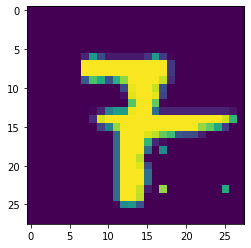



98
After 6 generations
Label: 6 ; Prediction: 8
Fitness: -0.24354108


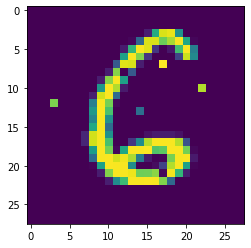



99
After 14 generations
Label: 9 ; Prediction: 5
Fitness: -0.26761758


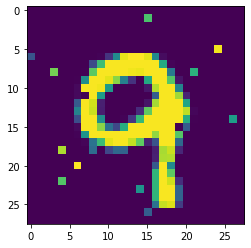

In [120]:
importlib.reload(EvoStrategy)

perturbed_images = 0
adv_evo_strategy = {}
for index in range(0,100):
    print()
    print(index)
    img = sample_x_test[index]
    label = np.argmax(sample_y_test[index])
    adv_evo_strategy[index] = EvoStrategy.AdversarialPerturbationEvoStraegy(model=model_,img=img,label=label,generation_size=25)
    no_steps = adv_evo_strategy[index].run_adversarial_attack()
    if adv_evo_strategy[index].stop_criterion() and no_steps > 0:
        perturbed_images += 1

In [121]:
count_q = 0
sum_q = 0
for index in range(0,100):
    if(adv_evo_strategy[index].queries > 1):
        count_q +=1
        sum_q += adv_evo_strategy[index].queries
        
print("Average queries for EVO algo:", sum_q/count_q)
print("Total count of perturbed images (classified correctly initially):", perturbed_images)

Average queries for EVO algo: 262.5
Total count of perturbed images (classified correctly initially): 100


<h3>SimBA pixel experiments</h3>

In [122]:
importlib.reload(simba_pixel)
simba_wrapper = simba_pixel.SimbaWrapper(model_, sample_x_test, sample_y_test, 64, 2000)

In [123]:
simba_wrapper.run_simba()

Index: 0
 Step: 0
 Prob: 1.0

 Step: 25
 Prob: 0.99999976

 Step: 50
 Prob: 0.9999864

 Step: 75
 Prob: 0.9989184

l0_distance exceeded
 Queries: 136
__________________
Index: 1
 Step: 0
 Prob: 1.0

 Step: 25
 Prob: 1.0

 Step: 50
 Prob: 1.0

 Step: 75
 Prob: 0.999982

 Step: 100
 Prob: 0.999537

l0_distance exceeded
 Queries: 200
__________________
Index: 2
 Step: 0
 Prob: 0.9999999

 Step: 25
 Prob: 0.99724776

l0_distance exceeded
 Queries: 69
__________________
Index: 3
 Step: 0
 Prob: 1.0

 Step: 25
 Prob: 0.9999502

 Step: 50
 Prob: 0.99818087

l0_distance exceeded
 Queries: 85
__________________
Index: 4
 Step: 0
 Prob: 0.9999995

 Step: 25
 Prob: 0.9998305

 Step: 50
 Prob: 0.9566216

l0_distance exceeded
 Queries: 100
__________________
Index: 5
 Step: 0
 Prob: 0.9999999

 Step: 25
 Prob: 0.9997423

 Step: 50
 Prob: 0.99871445

l0_distance exceeded
 Queries: 79
__________________
Index: 6
 Step: 0
 Prob: 0.9982284

 Step: 25
 Prob: 0.81519

image perturbed
 Queries: 59
_______

In [126]:
simba_wrapper.perturbed

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False]

In [ ]:
# SOTA architecture for ImageNet, run this for a chunk of data (ResNet-50, etc.) - pe imaginilie de test preferabil, aplicam atacurile
# cand l0 a depasit norma, ma opresc. numar count(queries)

<h3>CMA ES experiments below, neglect them for the moment</h3>

In [652]:
# import cma

In [653]:
# def get_function_for_label_and_model(label, model):
#     def evaluate_model(flat_image):
#         image = np.reshape(flat_image, (28,28,1))
#         prediction = model.predict([image])[0][label]
#         return prediction
#     return evaluate_model

In [654]:
# index = 5
# img = sample_x_test[index]
# label = np.argmax(sample_y_test[index])

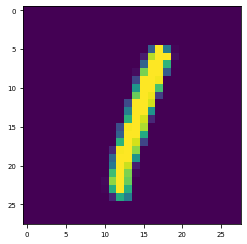

In [655]:
# plt.imshow(np.reshape(img, (28,28)))

In [656]:
# opt_funct = get_function_for_label_and_model(label, model_all_data)

In [657]:
# start_point = np.reshape(img, (-1))

In [664]:
# es = cma.CMAEvolutionStrategy(start_point, 10)

(11_w,23)-aCMA-ES (mu_w=6.7,w_1=25%) in dimension 784 (seed=489499, Mon Sep  7 00:58:17 2020)


0.99999917


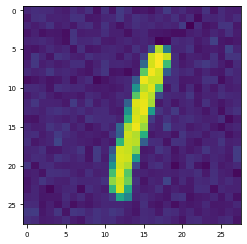

0.9999987


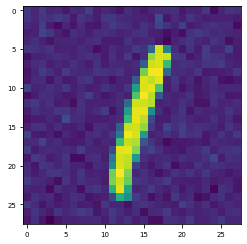

0.9999982


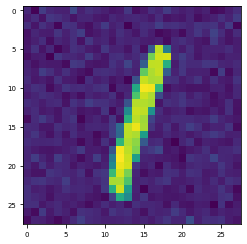

0.9999938


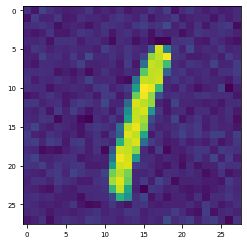

0.9999931


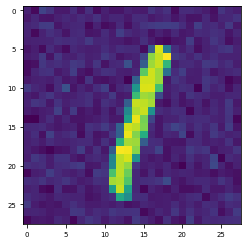

0.99998677


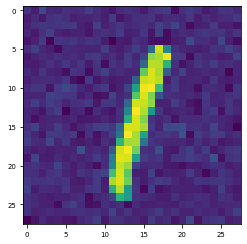

0.9999783


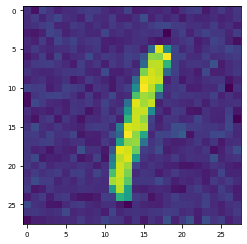

0.9999682


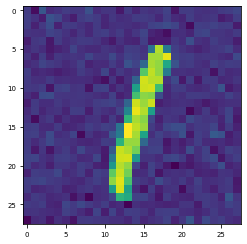

0.99993455


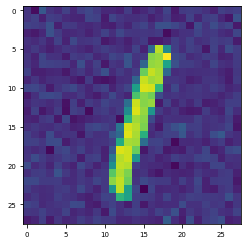

0.9999056


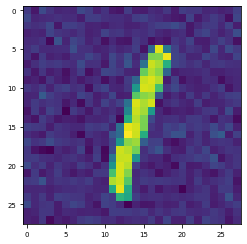

0.9998528


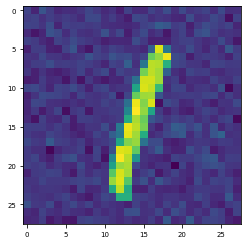

0.999777


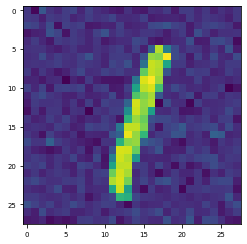

0.99967694


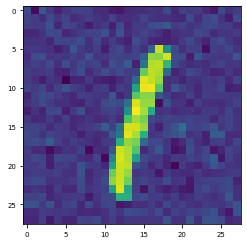

0.9993537


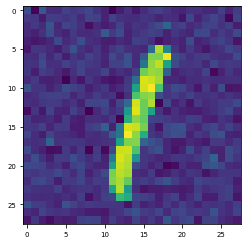

0.99907565


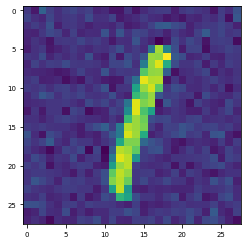

0.9966272


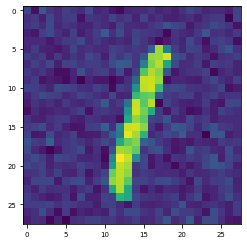

0.9954573


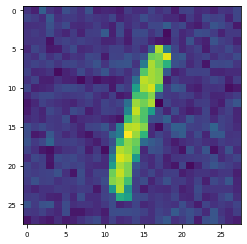

0.9932099


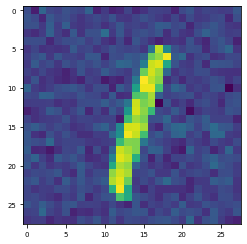

0.9875214


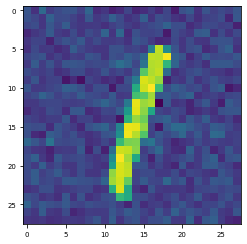

0.98244876


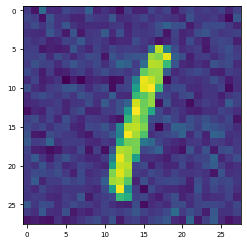

0.9660637


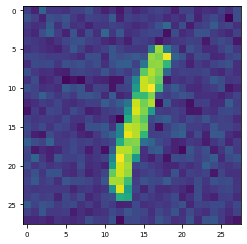

0.9304125


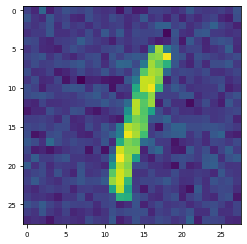

0.7649613


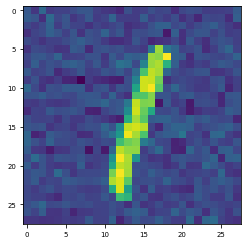

0.6237265


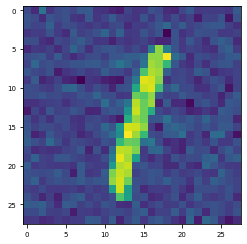

0.56319803


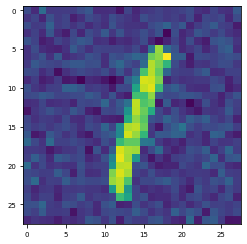

0.38009593


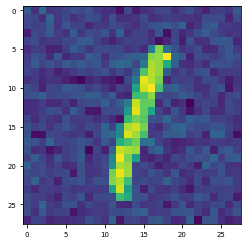

0.297375


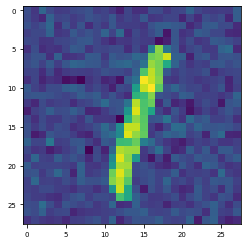

0.31472403


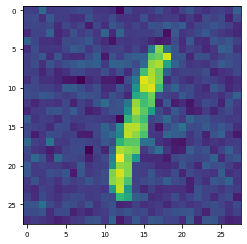

0.2549865


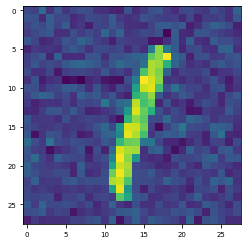

0.21597752


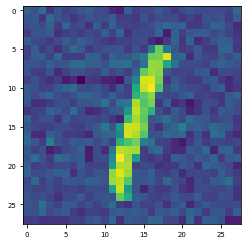

0.16823494


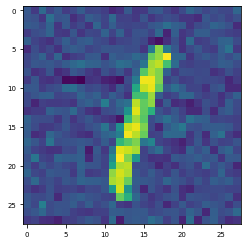

0.15477574


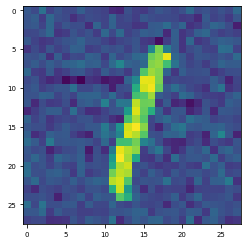

0.14834954


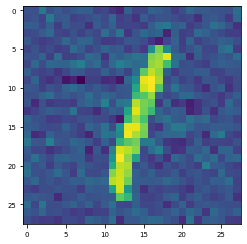

0.14547814


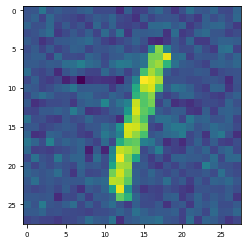

0.13613598


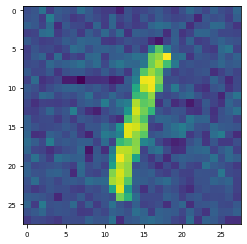

0.13085957


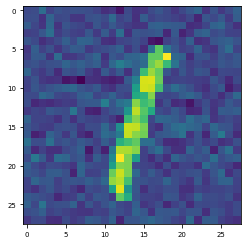

0.11676077


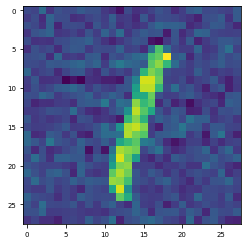

0.10601775


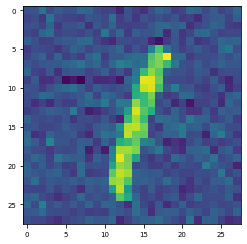

0.096529916


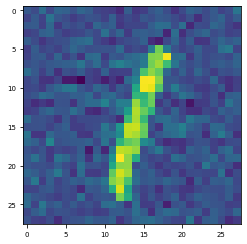

0.087963395


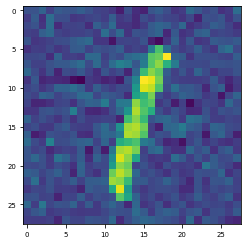

0.08274897


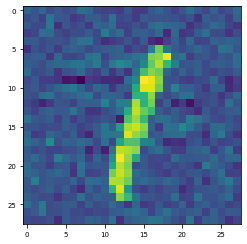

0.07038542


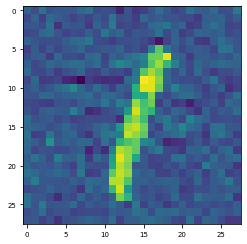

0.05362248


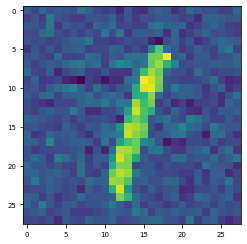

0.042372964


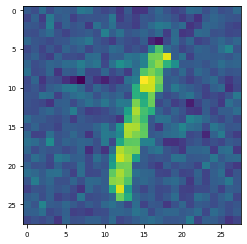

0.034612406


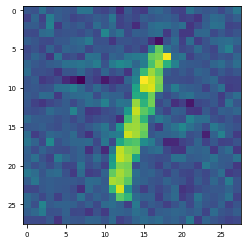

0.02155903


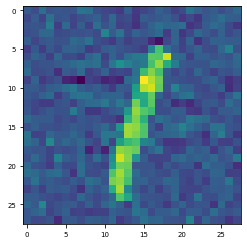

0.014314187


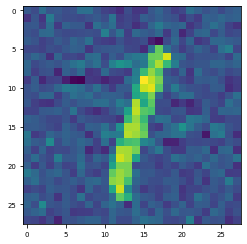

0.01146977


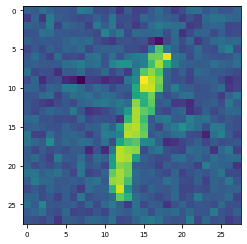

0.008974914


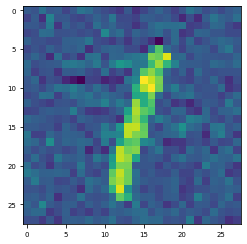

0.006848076


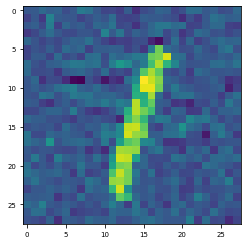

0.0043435


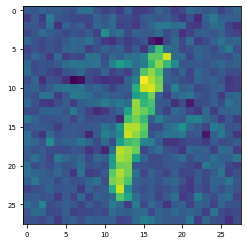

0.0026832896


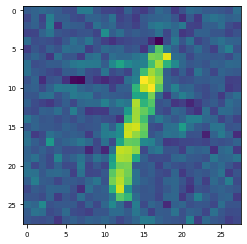

0.0021047376


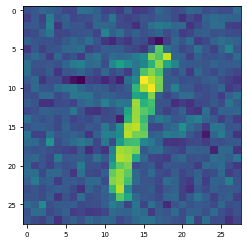

0.001296895


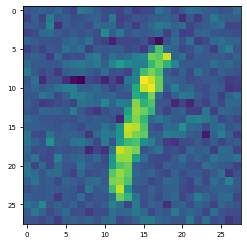

0.00121884


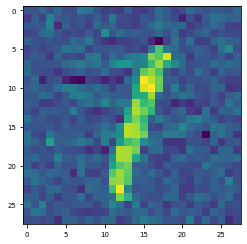

0.0006936479


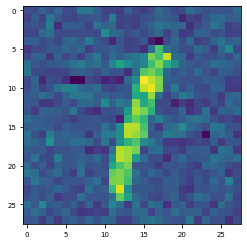

0.00057498616


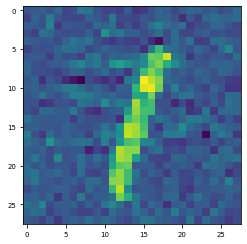

0.0003649789


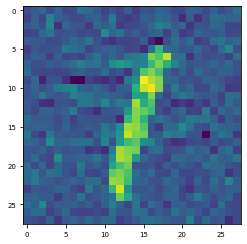

0.00024360289


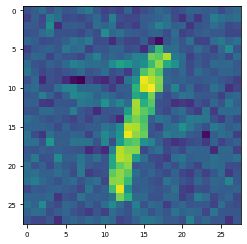

0.00019449125


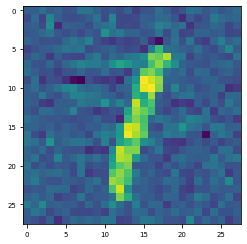

0.00012681095


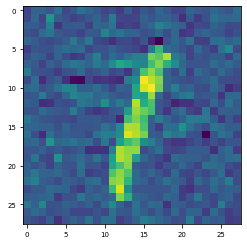

0.00011606731


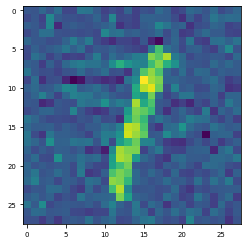

9.3812196e-05


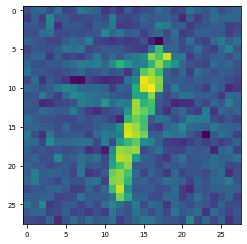

7.864188e-05


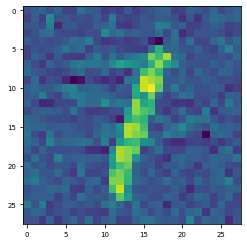

7.236423e-05


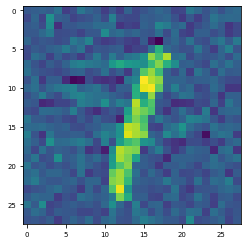

3.7758356e-05


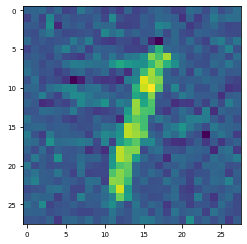

3.7278256e-05


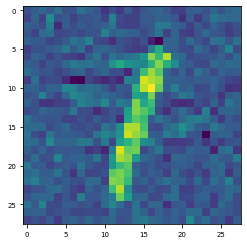

2.4159634e-05


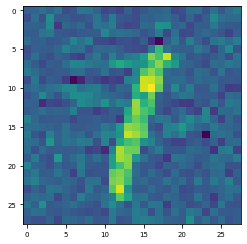

2.2089427e-05


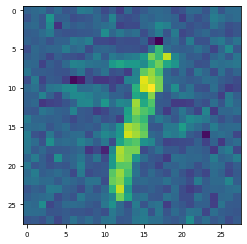

1.3592358e-05


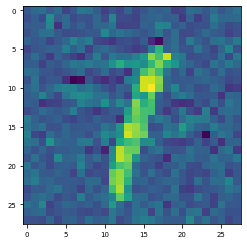

9.1817465e-06


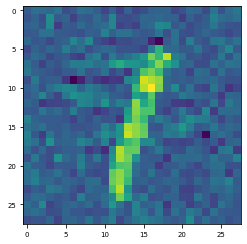

4.688505e-06


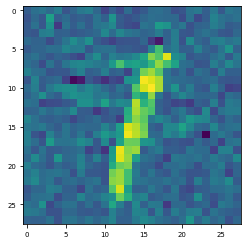

3.366979e-06


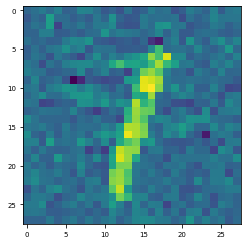

2.5382437e-06


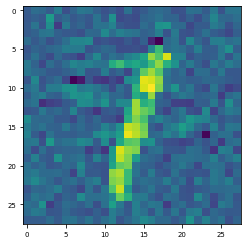

1.2709535e-06


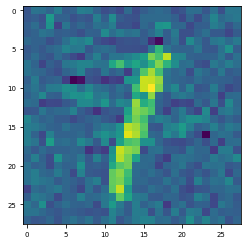

1.2260904e-06


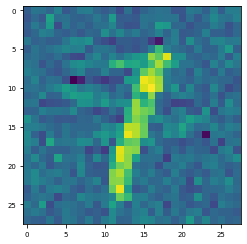

9.021089e-07


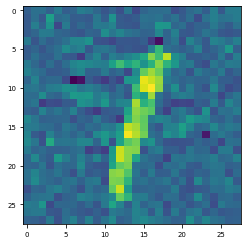

6.4621e-07


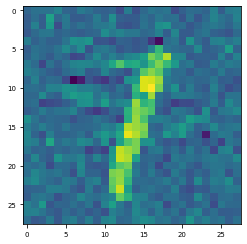

4.082847e-07


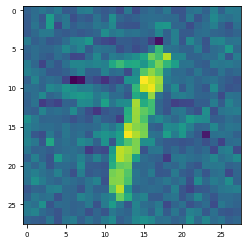

3.057566e-07


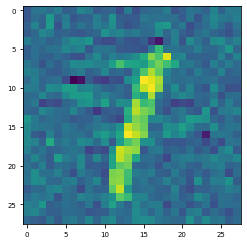

2.1554766e-07


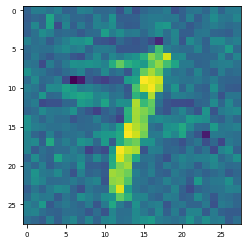

1.7543043e-07


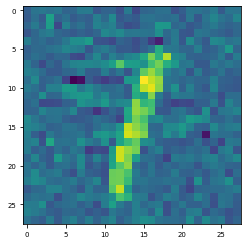

1.2426169e-07


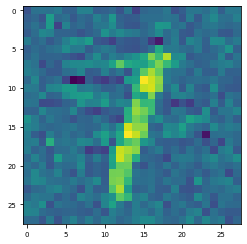

1.2545944e-07


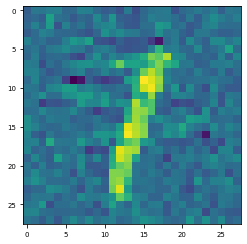

7.9316436e-08


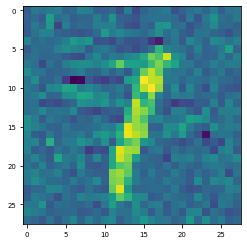

7.020275e-08


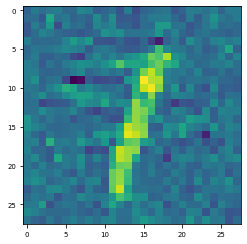

4.522761e-08


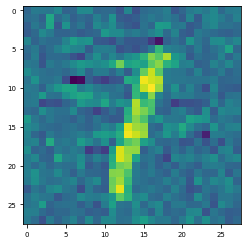

2.715667e-08


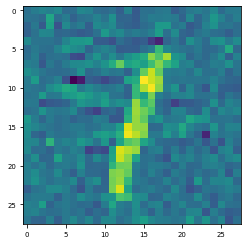

2.7012044e-08


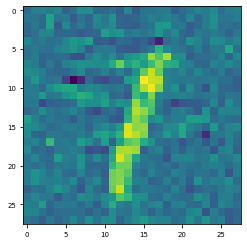

1.7348077e-08


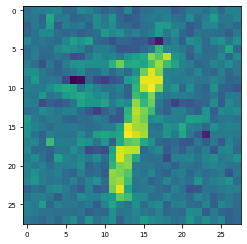

8.931036e-09


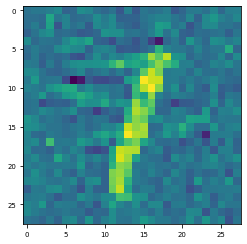

8.348961e-09


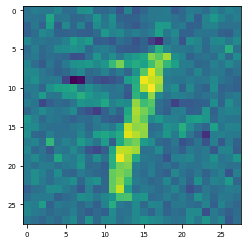

6.0816183e-09


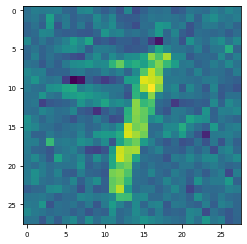

4.471025e-09


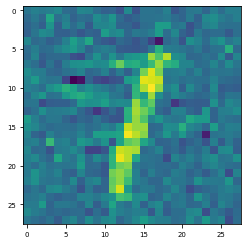

4.323905e-09


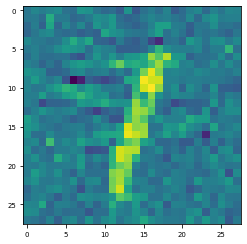

2.5481486e-09


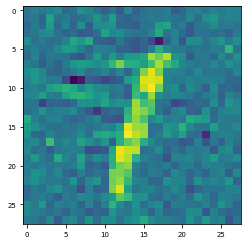

2.2240543e-09


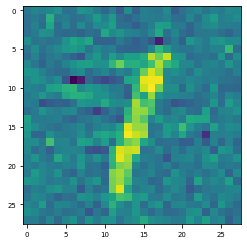

1.37309e-09


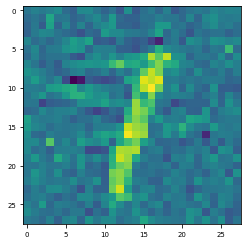

1.051876e-09


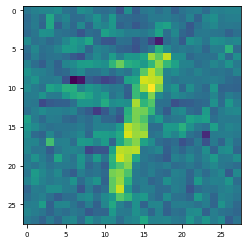

6.170895e-10


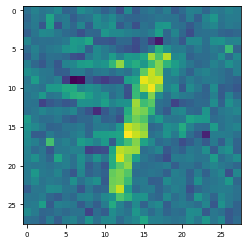

3.8709688e-10


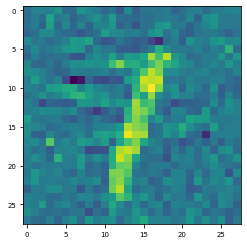

3.005088e-10


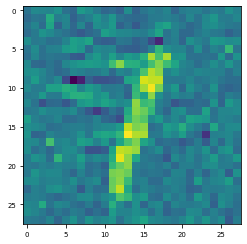

2.1860076e-10


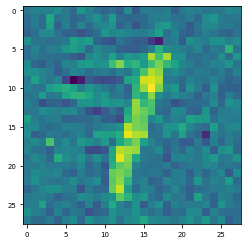

1.9801429e-10


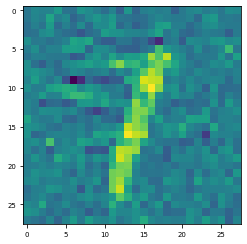

1.5613179e-10


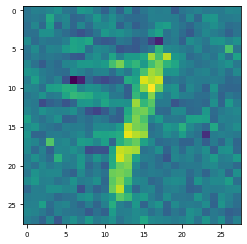

1.0222675e-10


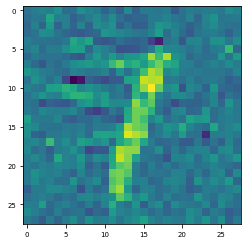

5.9142684e-11


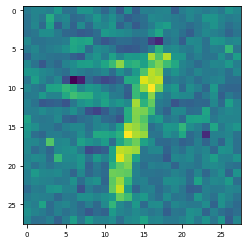

5.7714812e-11


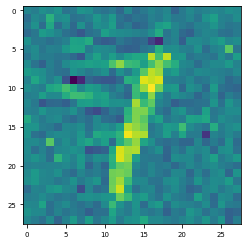

3.0309245e-11


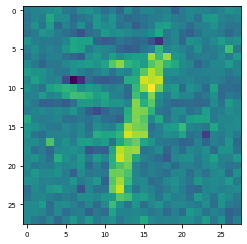

2.2777216e-11


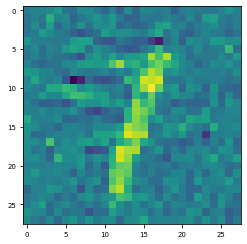

1.5971153e-11


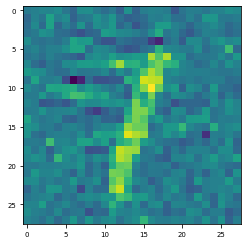

1.0240965e-11


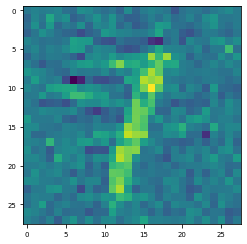

8.598634e-12


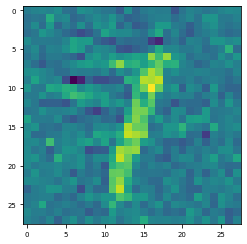

6.9359583e-12


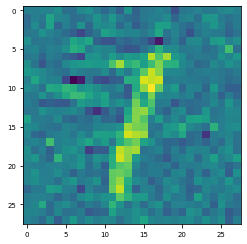

4.4546324e-12


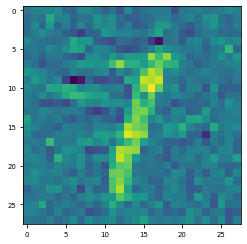

1.9486817e-12


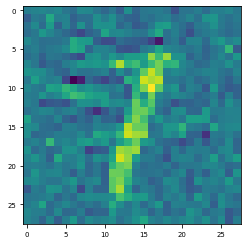

1.6022917e-12


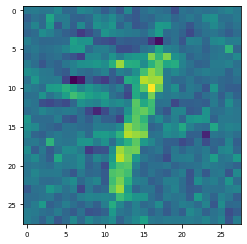

1.409316e-12


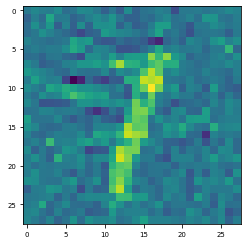

8.9244383e-13


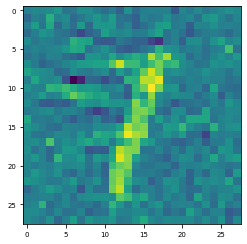

6.938132e-13


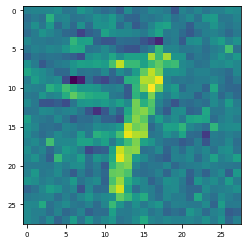

5.2801454e-13


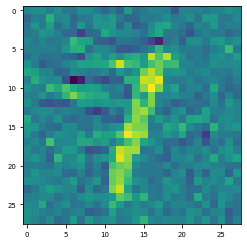

3.1341688e-13


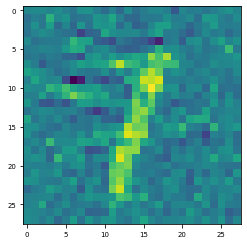

2.2996945e-13


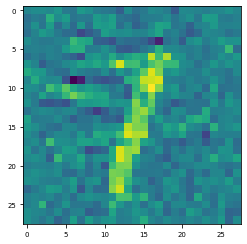

1.4360103e-13


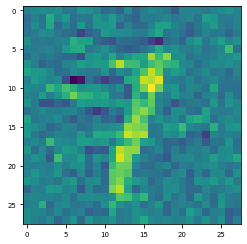

1.2804592e-13


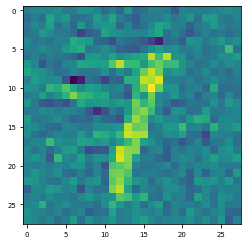

9.787856e-14


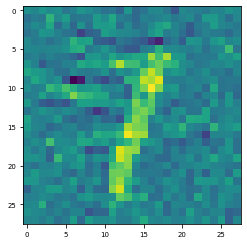

8.015368e-14


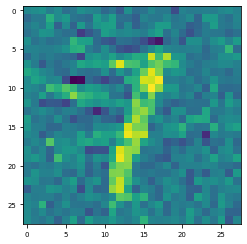

4.2004753e-14


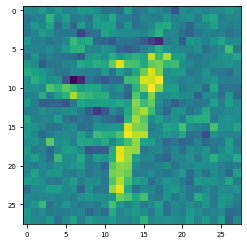

3.4925933e-14


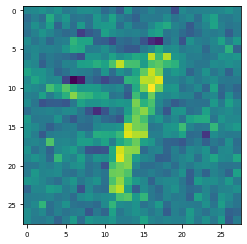

2.7553992e-14


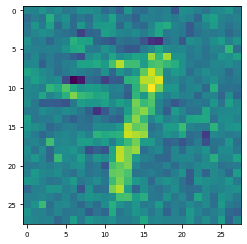

1.8808934e-14


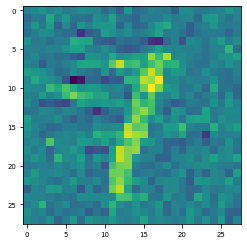

1.5139384e-14


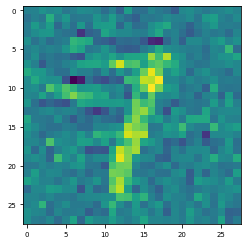

6.6348794e-15


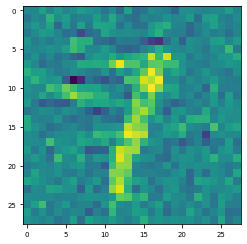

5.7533387e-15


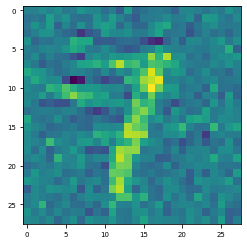

4.6614082e-15


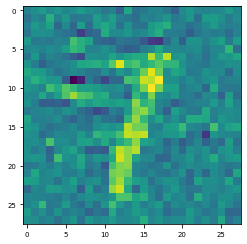

3.0007485e-15


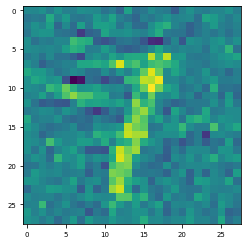

1.7892216e-15


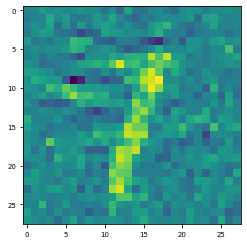

1.4576035e-15


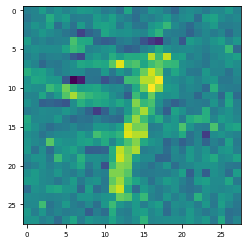

7.189018e-16


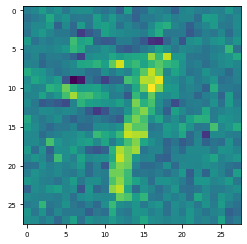

5.830713e-16


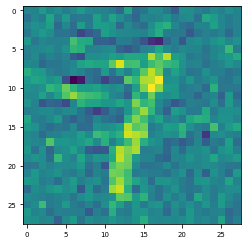

3.3069405e-16


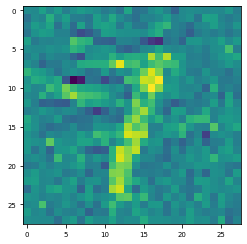

3.4515918e-16


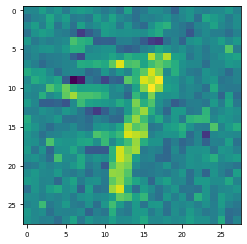

2.2334202e-16


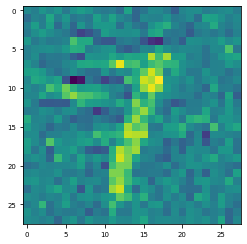

1.3079109e-16


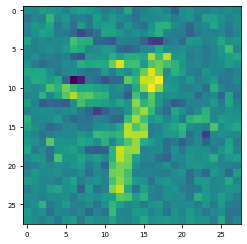

1.2900329e-16


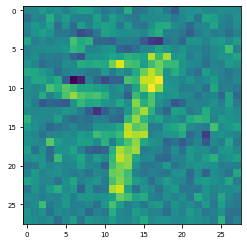

1.03585936e-16


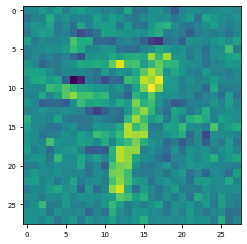

4.2029613e-17


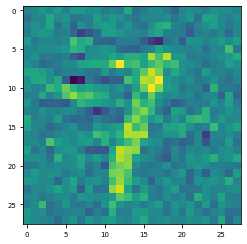

3.4371816e-17


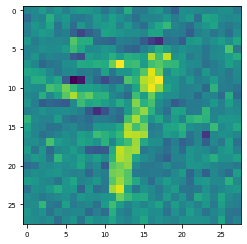

1.839426e-17


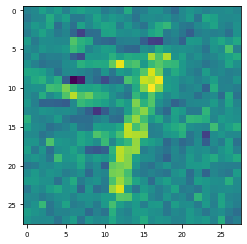

1.4014714e-17


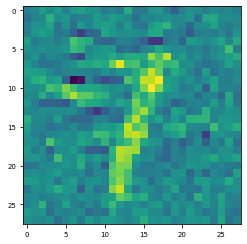

1.17644026e-17


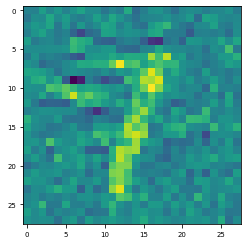

7.140537e-18


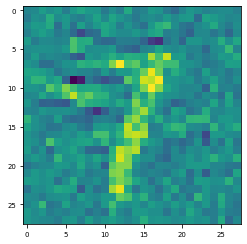

4.2185095e-18


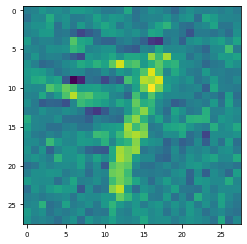

3.9603993e-18


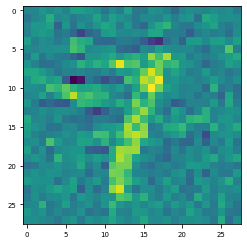

1.8412443e-18


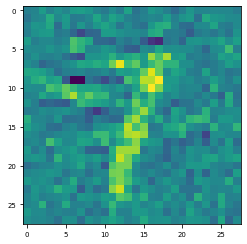

1.4017974e-18


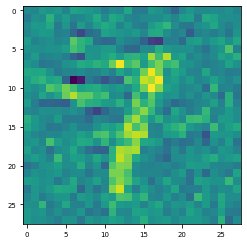

9.774149e-19


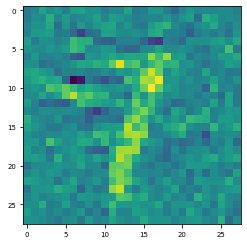

6.106807e-19


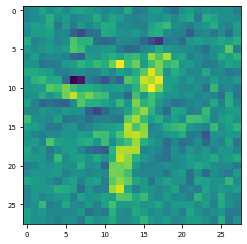

3.4198898e-19


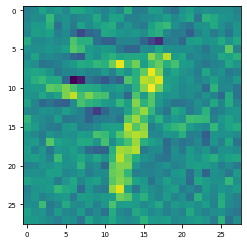

2.6222507e-19


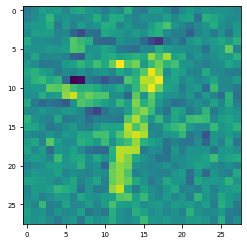

1.329952e-19


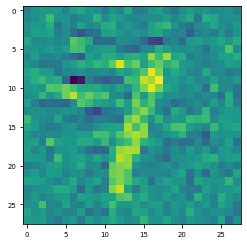

1.0578294e-19


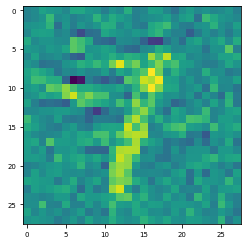

5.676318e-20


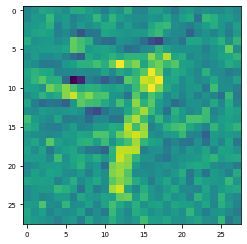

4.8418025e-20


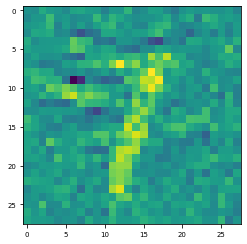

1.892327e-20


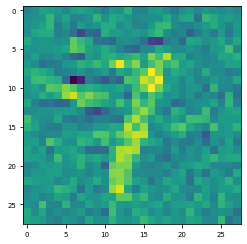

1.6419761e-20


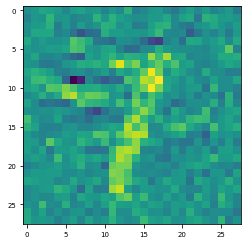

8.207919e-21


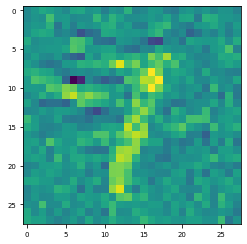

7.59262e-21


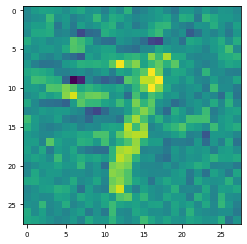

5.332282e-21


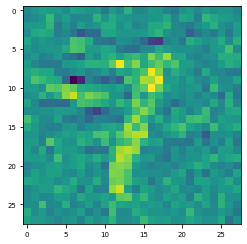

3.6891565e-21


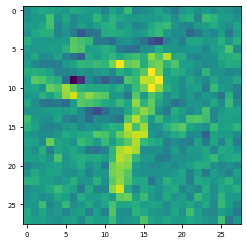

1.5897885e-21


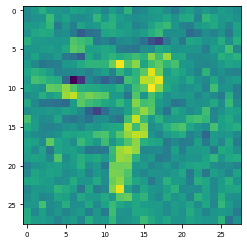

1.2225422e-21


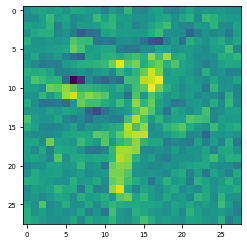

5.1523563e-22


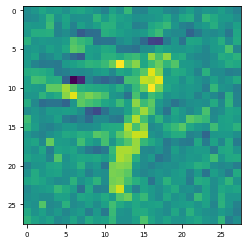

2.3640644e-22


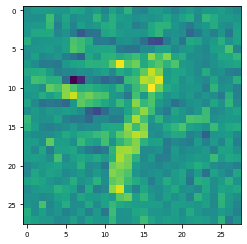

3.0370597e-22


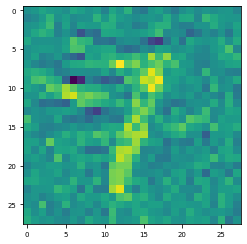

1.5813021e-22


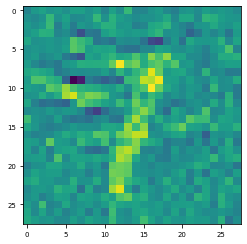

8.103472e-23


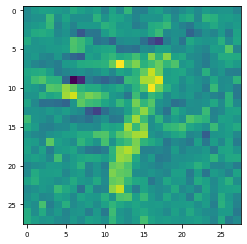

6.4638064e-23


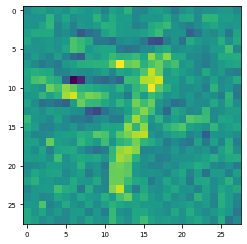

2.6186771e-23


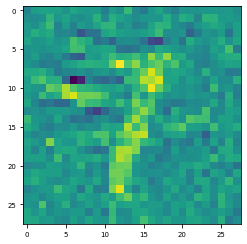

1.5884894e-23


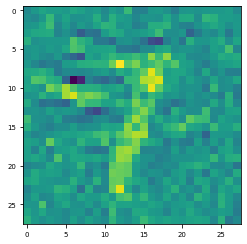

9.0992e-24


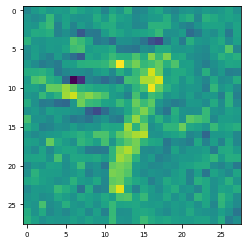

8.0134905e-24


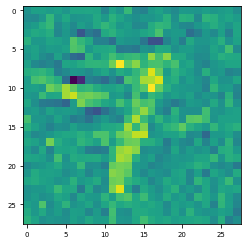

5.238682e-24


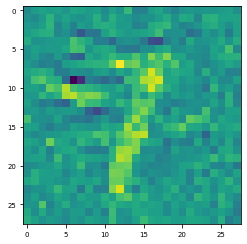

3.6849456e-24


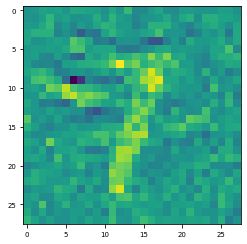

2.8713056e-24


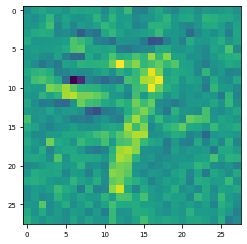

1.5595782e-24


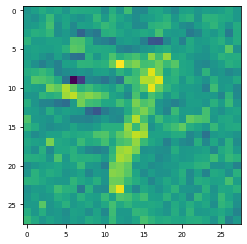

7.642644e-25


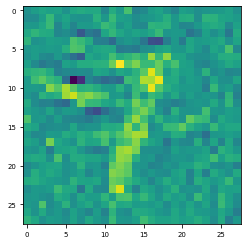

4.1811196e-25


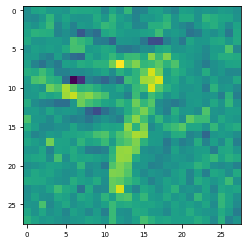

2.5769939e-25


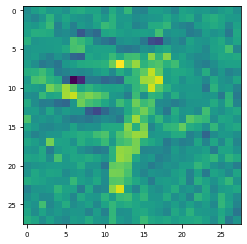

2.2494438e-25


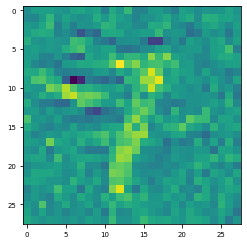

1.8474785e-25


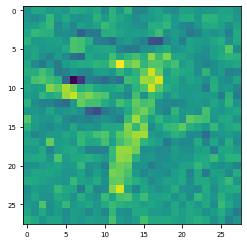

1.3260472e-25


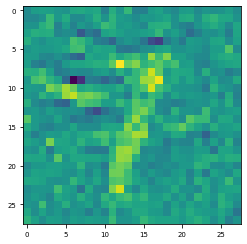

5.6412873e-26


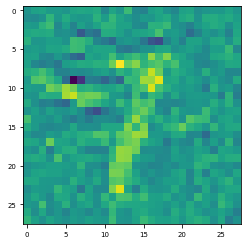

6.978242e-26


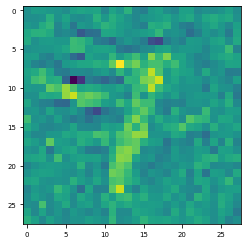

5.325439e-26


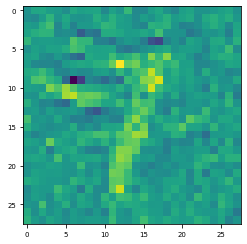

2.6422135e-26


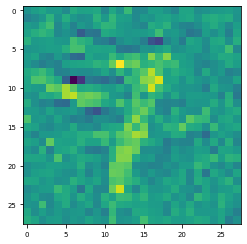

1.6261198e-26


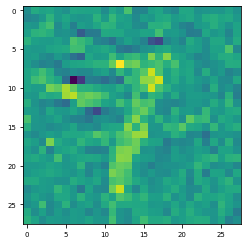

1.2468132e-26


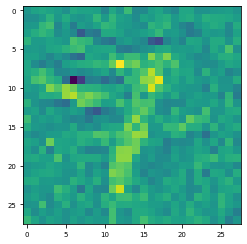

8.633129e-27


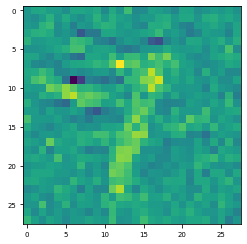

3.951554e-27


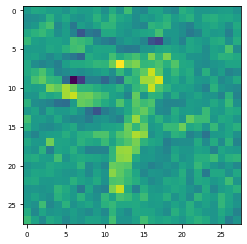

3.0082718e-27


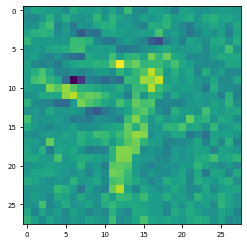

1.1319795e-27


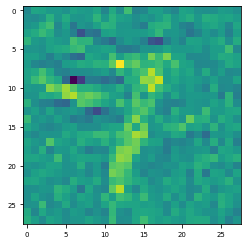

8.832325e-28


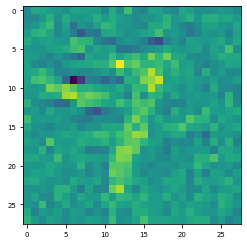

6.7647485e-28


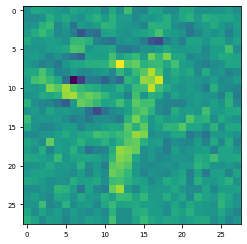

3.0912618e-28


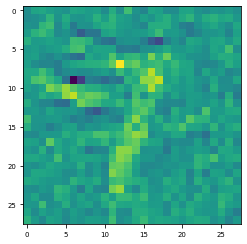

2.6917144e-28


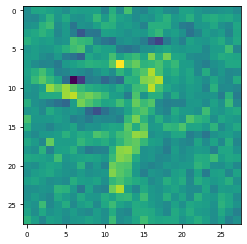

1.6198897e-28


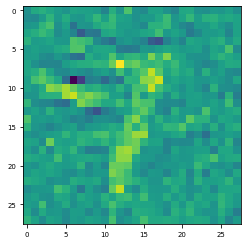

1.129783e-28


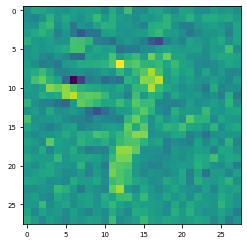

7.617307e-29


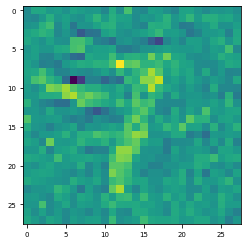

4.919229e-29


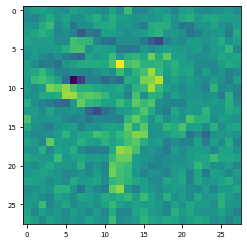

1.1279437e-29


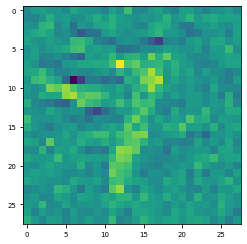

1.2764224e-29


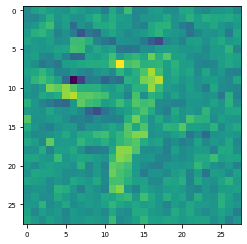

6.812574e-30


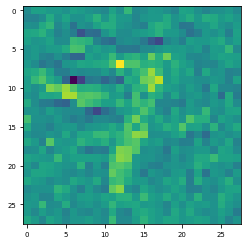

5.6326744e-30


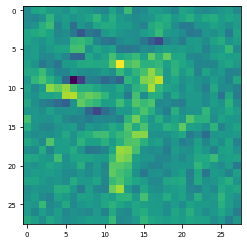

4.4201928e-30


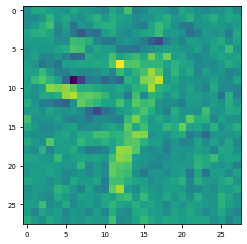

1.6486083e-30


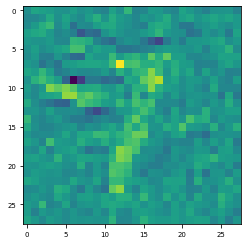

1.3425604e-30


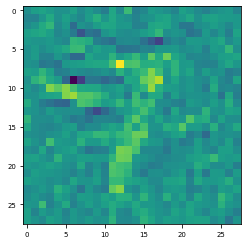

5.057133e-31


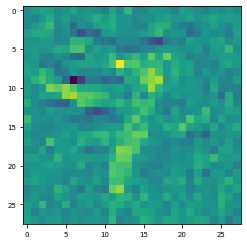

4.8000668e-31


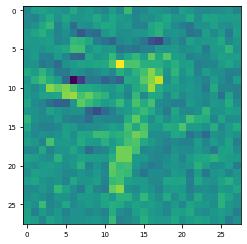

2.5488296e-31


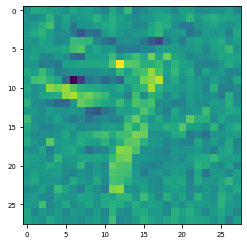

1.5947002e-31


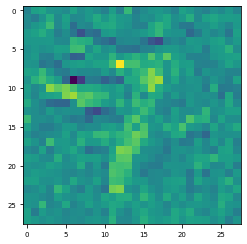

9.189018e-32


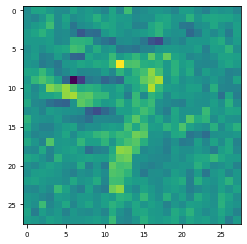

7.0506804e-32


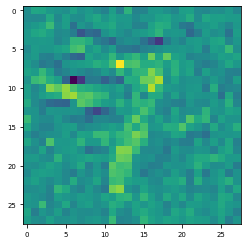

2.7968317e-32


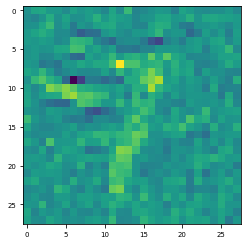

1.525375e-32


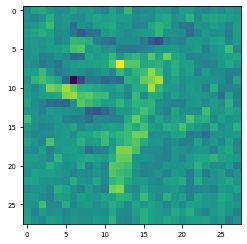

1.5527807e-32


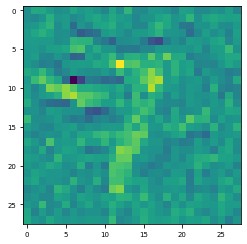

9.691214e-33


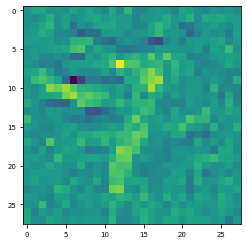

7.1504344e-33


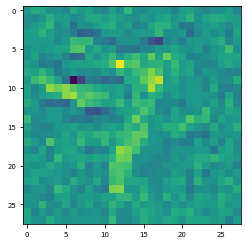

3.5568306e-33


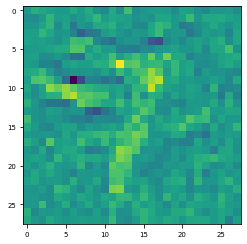

2.2626714e-33


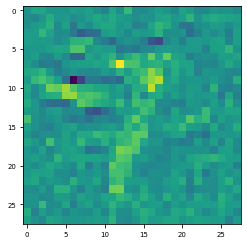

1.659414e-33


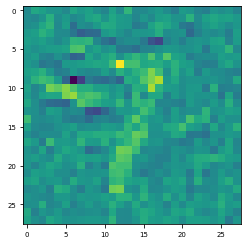

5.7125986e-34


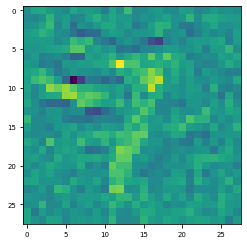

4.957779e-34


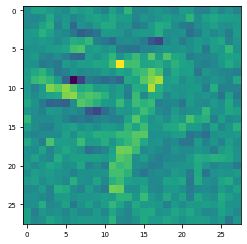

4.2999726e-34


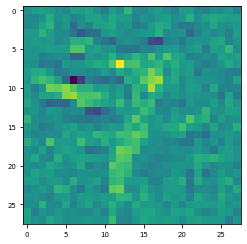

1.8806701e-34


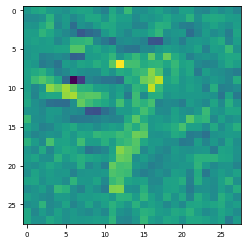

5.0824186e-35


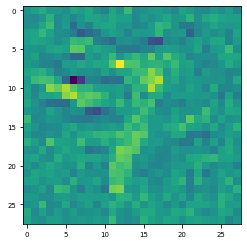

2.8668353e-35


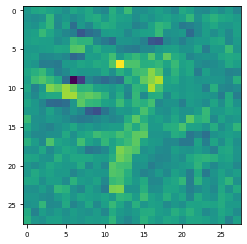

2.4099956e-35


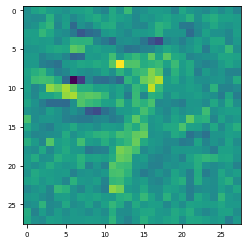

8.2752636e-36


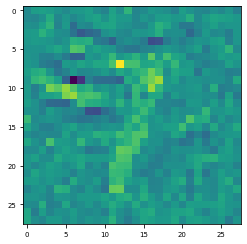

7.027894e-36


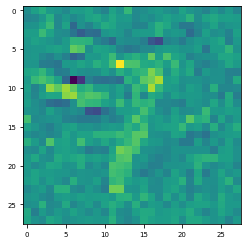

3.364209e-36


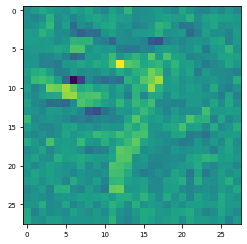

1.7234296e-36


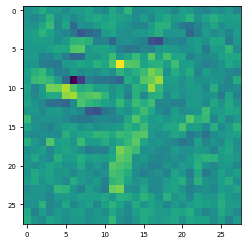

1.4509301e-36


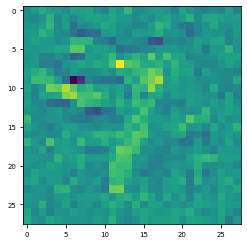

4.1323198e-37


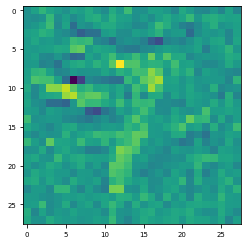

4.867577e-37


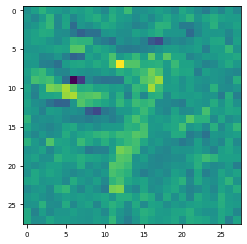

1.1339445e-37


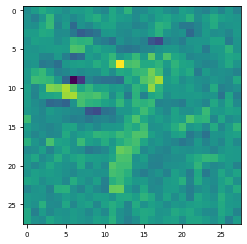

1.598996e-37


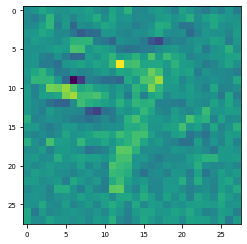

5.3035924e-38


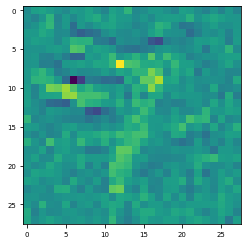

3.679301e-38


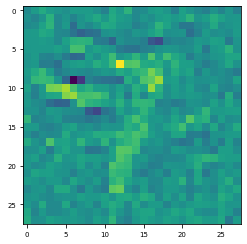

2.0454815e-38


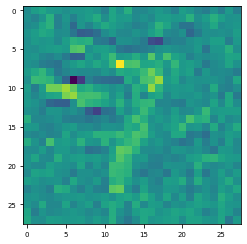

1.2087591e-38


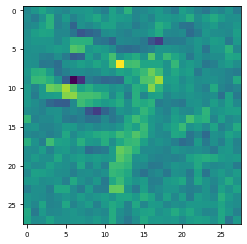

0.0


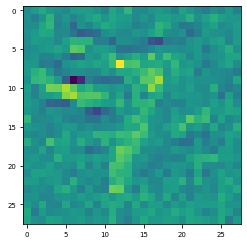

0.0


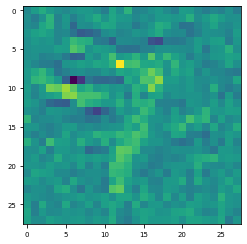

0.0


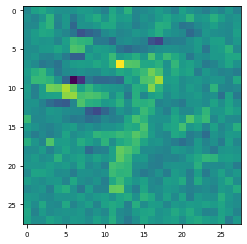

0.0


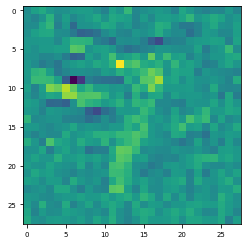

0.0


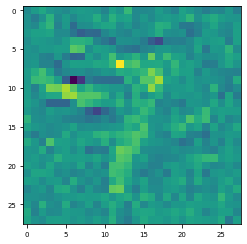

0.0


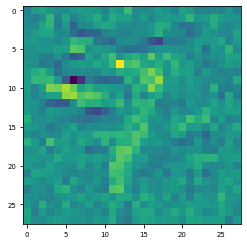

In [665]:
# while not es.stop():
#     solutions = es.ask()
#     fitnesses = [opt_funct(x) for x in solutions]
#     index_best = np.argmin(fitnesses)
#     img = np.reshape(solutions[index_best], (28,28))
#     print(min(fitnesses))
#     plt.imshow(img)
#     plt.show()
#     es.tell(solutions, fitnesses)
#     es.logger.add()  # write data to disc to be plotted
# #     es.disp()

# # es.result_pretty()
# # cma.plot()  # shortcut for es.logger.plot()